# --------------------- IKYRA BASIC STATISTICS ASSIGNEMNT -----------------------

In this assignment, we have to answer these following question:
Questions:
1. Perform basic exploratory data analysis which should include the following and print out your insights at every step:

    A. The shape of the data
    
    B. The data type of each attribute
    
    C. Checking the presence of missing values
    
    D. 5 points summary of numerical attributes
    
    E. Distribution of 'bmi', 'age' and 'charges' columns
    
    F. The measure of skewness of 'bmi', 'age', and 'charges' columns
    
    G. Checking the presence of outliers in 'bmi', 'age' and 'charges' columns
    

2. Answer the following questions with statistical evidence

    A. Do charges of people who smoke differ significantly from the people who don't? (Hypothesis Testing)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load the data
data = pd.read_csv(r"D:\Backup\Data Science\IYKRA\Tugas\Dataset\insurance.csv").drop_duplicates()

## 1.a The shape of the data

In [3]:
data.shape

(1337, 7)

## 1.b The data type of each attribute

In [4]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

## 1.c Checking the presence of missing values

In [5]:
data.isnull().sum() / len(data) * 100

age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64

## 1.d 5 points summary of numerical attributes

In [6]:
data.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


## 1.e Distribution of 'bmi', 'age' and 'charges' columns

Text(0.5, 1.0, 'Distribution Of BMI')

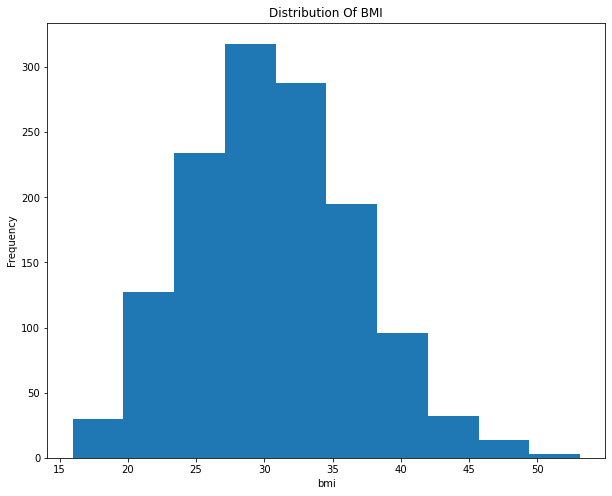

In [7]:
#Distribution of BMI
plt.figure(figsize=(10,8))
data.bmi.plot(kind='hist')
plt.xlabel('bmi')
plt.title('Distribution Of BMI')

Text(0.5, 1.0, 'Distribution Of Age')

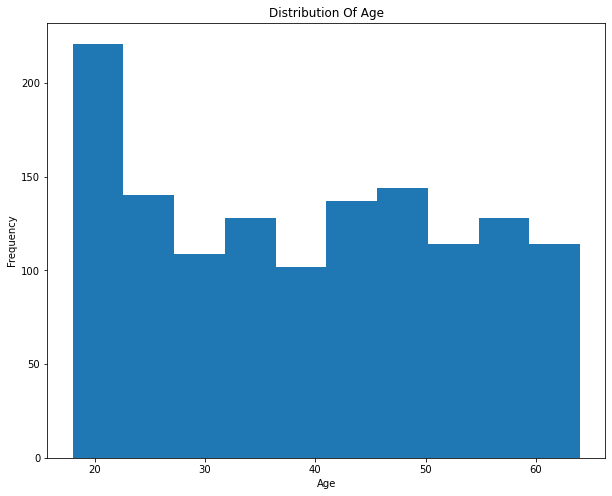

In [8]:
#Distribution of Age
plt.figure(figsize=(10,8))
data.age.plot(kind='hist')
plt.xlabel('Age')
plt.title('Distribution Of Age')

Text(0.5, 1.0, 'Distribution Of Charges')

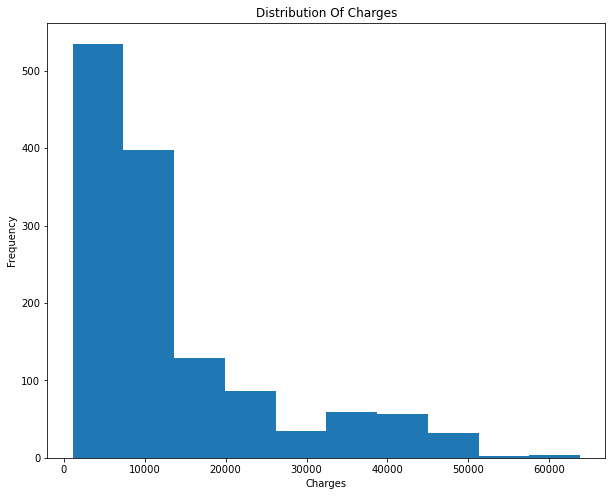

In [9]:
#Distribution of Charges
plt.figure(figsize=(10,8))
data.charges.plot(kind='hist')
plt.xlabel('Charges')
plt.title('Distribution Of Charges')

## 1.f The measure of skewness of 'bmi', 'age', and 'charges' columns

In [10]:
#Skewness of BMI
print("The skewness of BMI variable is", round(data.bmi.skew(),2))
#Skewness of Age
print("The skewness of Age variable is", round(data.age.skew(),2))
#Skewness of Charges
print("The skewness of Charges variable is", round(data.charges.skew(),2))

The skewness of BMI variable is 0.28
The skewness of Age variable is 0.05
The skewness of Charges variable is 1.52


## 1.g Checking the presence of outliers in 'bmi', 'age' and 'charges' columns

In [11]:
#Mengitung persen outliers dari data    
def percent_outliers(i):
    Q1 = data[i].quantile(0.25)
    Q3 = data[i].quantile(0.75)
    IQR = Q3 - Q1
    
    #menentukan upper limit biasa dan upper limit ekstim
    lower_limit = data[i].quantile(0.25) - (IQR * 1.5)
    lower_limit_extreme = data[i].quantile(0.25) - (IQR * 3)
    upper_limit = data[i].quantile(0.75) + (IQR * 1.5)
    upper_limit_extreme = data[i].quantile(0.75) + (IQR * 3)
    #melihat persenan outliers terhadap total data
    print('Lower Limit: {} %'.format(data[(data[i] >= lower_limit)].shape[0]/ data.shape[0]*100))
    print('Lower Limit Extereme: {} %'.format(data[(data[i] >= lower_limit_extreme)].shape[0]/data.shape[0]*100))
    print('Upper Limit: {} %'.format(data[(data[i] >= upper_limit)].shape[0]/ data.shape[0]*100))
    print('Upper Limit Extereme: {} %'.format(data[(data[i] >= upper_limit_extreme)].shape[0]/data.shape[0]*100))

Text(0.5, 1.0, 'Boxplot In BMI Column')

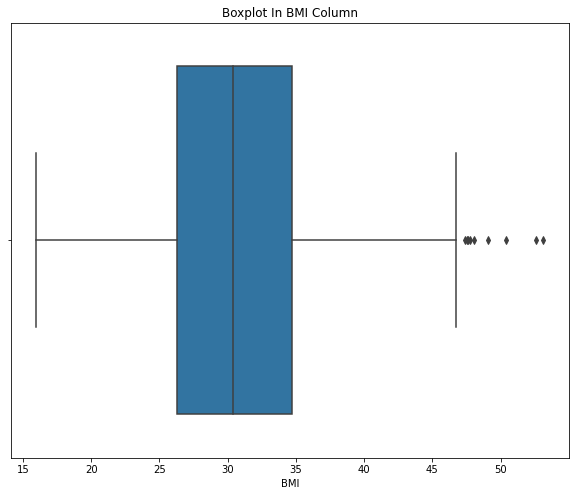

In [12]:
#Outliers in BMI Column
plt.figure(figsize=(10,8))
sns.boxplot(data.bmi)
plt.xlabel('BMI')
plt.title('Boxplot In BMI Column')

In [13]:
#Perncet outliers in BMI Column
percent_outliers('bmi')

Lower Limit: 100.0 %
Lower Limit Extereme: 100.0 %
Upper Limit: 0.6731488406881078 %
Upper Limit Extereme: 0.0 %


Text(0.5, 1.0, 'Boxplot In Age Column')

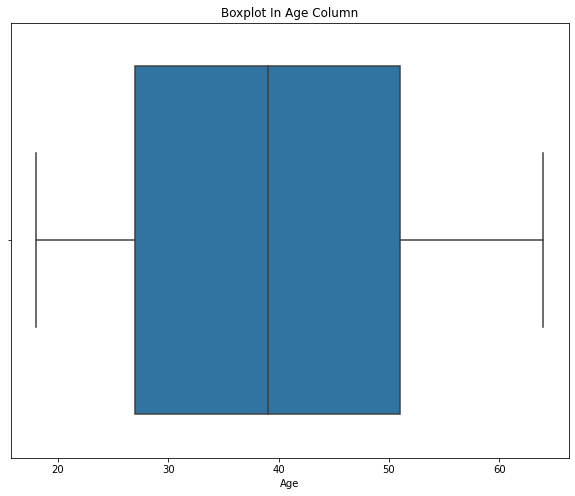

In [14]:
#Outliers in Age Column
plt.figure(figsize=(10,8))
sns.boxplot(data.age)
plt.xlabel('Age')
plt.title('Boxplot In Age Column')

In [15]:
#Perncet outliers in Age Column
percent_outliers('age')

Lower Limit: 100.0 %
Lower Limit Extereme: 100.0 %
Upper Limit: 0.0 %
Upper Limit Extereme: 0.0 %


Text(0.5, 1.0, 'Boxplot In Charges Column')

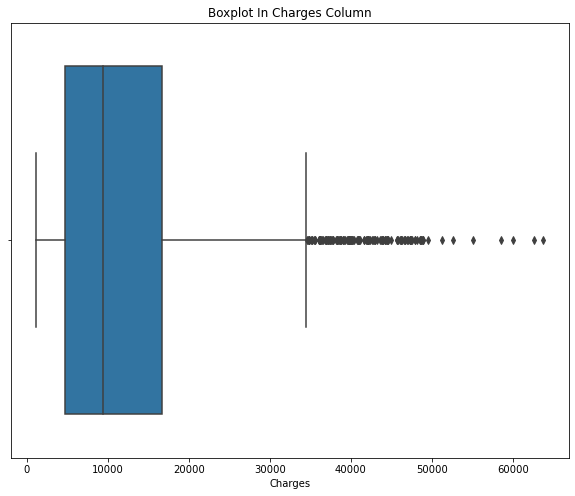

In [16]:
#Outliers in Age Column
plt.figure(figsize=(10,8))
sns.boxplot(data.charges)
plt.xlabel('Charges')
plt.title('Boxplot In Charges Column')

In [17]:
#Perncet outliers in Charges Column
percent_outliers('charges')

Lower Limit: 100.0 %
Lower Limit Extereme: 100.0 %
Upper Limit: 10.396409872849663 %
Upper Limit Extereme: 0.44876589379207177 %


## 2. Hypothesis Testing 

## Do charges of people who smoke differ significantly from the people who don't? (Hypothesis Testing)

Steps to do Hypthesis Testing:
   1. Define the null and alternate hypothesis

   2. Define an analysis plan to find how to use sample data to estimate the null hypothesis

   3. Test and Conclude based on test output


## 2.1 Define Null & Alternate Hypthesis

H0: There is **NO** a diffrenece on charges from smoker and non-smoker

H1: There is a diffrenece on charges from smoker and non-smoker

## 2.2 Define Analysis Plan

1. Data Preparation

2. Check The Normality

3. Check Number Of Sample

4. Check Independent / Related

5. Choose The Appropriate Test

### 2.2.1 Data Preparation

In [18]:
#Make a new data frame
data_n = data[data["smoker"] == "no"]
data_y = data[data["smoker"] == "yes"]
print('Number of non-smoker:', len(data_n))
print('Number of smoker:', len(data_y))

Number of non-smoker: 1063
Number of smoker: 274


In [19]:
s_no = data_n["charges"]
s_yes = data_y["charges"]

In [20]:
print('-'*50, "Before")
print(s_no.shape)
print(s_yes.shape)

#Make dataset is equal
s_no =  s_no.sample(n=274) 

print('-'*50, "After")
print(s_no.shape)
print(s_yes.shape)

-------------------------------------------------- Before
(1063,)
(274,)
-------------------------------------------------- After
(274,)
(274,)


### 2.2.2 Check The Normality

This test is to determine the paramteric or non-parametric test that we should take. If the distibution is no normal, then we have to take paramteric. If the distribution is not normal, then we have to choose non-parametric.

In [21]:
from scipy.stats import shapiro

In [22]:
#Check the non smoker sample
stat, p = shapiro(s_no)
a = 0.5 #alpha (level of significance)

print('The P-Value is:',p)
print('-'*30)
if p < a:
    print("The distribution is Not normal") #H1
else:
    print("The distribution is normal") #H0

The P-Value is: 8.221576902351507e-14
------------------------------
The distribution is Not normal


In [23]:
#Check the smoker sample
stat, p = shapiro(s_yes)
a = 0.5 #alpha (level of significance)

print('The P-Value is:',p)
print('-'*30)
if p < a:
    print("The distribution is Not normal") #H1
else:
    print("The distribution is normal") #H0

The P-Value is: 3.6251879276250065e-09
------------------------------
The distribution is Not normal


### 2.2.3 Check Number Of Sample

We have two sample, smoker and non-smoker. So we have **2 samples**

### 2.2.4 Check Independent / Related

From our sample, it is independent samples. Because the sample because it is not related each others. So the **samples is independent**

### 2.2.5 Choose The Appropiate Test
From several test before, we see that our samples distribution is not normal, we have two sample, and our sample is independent. So we can choose Mann-WhitneyU Test for this kind of hypthesis testing.

In [24]:
from scipy.stats import mannwhitneyu

In [25]:
tstat2, pval2 = mannwhitneyu(s_no, s_yes)
print('p-value =', pval2)
print('-'*30)
if pval2 < 0.05:
    print('There is a diffrenece on charges from smoker and non-smoker') #H1
else:
    print('There is No a diffrenece on charges from smoker and non-smoker') #H0

p-value = 2.1723594092935224e-81
------------------------------
There is a diffrenece on charges from smoker and non-smoker


## 2.3 Conclude

Based on hypothesis testing, we can say that there is no enough evidence to support Null hyphotesis or we can say we reject the null hypothesis. So the conclusion is **there is a difference on charges from smoker and non-smoker**.